In [3]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

2022-12-10 20:54:11.759298: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-10 20:54:11.860964: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-10 20:54:11.863572: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-10 20:54:11.863585: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

# 各パス指定

In [4]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.hdf5'

# 分類数設定

In [5]:
NUM_CLASSES = 4

# 入力長

In [6]:
TIME_STEPS = 16
DIMENSION = 2

# 学習データ読み込み

In [7]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [8]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [10]:
use_lstm = False
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

2022-12-10 20:54:34.176523: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-10 20:54:34.176556: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-10 20:54:34.176573: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (akshay-Mi-NoteBook-Ultra): /proc/driver/nvidia/version does not exist
2022-12-10 20:54:34.176792: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 24)                792       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                250       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
Total params: 1,097
Trainable params: 1,097
Non-trainable params: 0
_________________________________________________________________


In [12]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [13]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [14]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/32 [..............................] - ETA: 11s - loss: 1.6285 - accuracy: 0.1172
Epoch 1: saving model to model/point_history_classifier/point_history_classifier.hdf5
32/32 [==============================] - 1s 5ms/step - loss: 1.5958 - accuracy: 0.2032 - val_loss: 1.5786 - val_accuracy: 0.2598
Epoch 2/1000
 1/32 [..............................] - ETA: 0s - loss: 1.5745 - accuracy: 0.2344
Epoch 2: saving model to model/point_history_classifier/point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 1.5524 - accuracy: 0.2555 - val_loss: 1.5314 - val_accuracy: 0.2470
Epoch 3/1000
 1/32 [..............................] - ETA: 0s - loss: 1.5211 - accuracy: 0.2422
Epoch 3: saving model to model/point_history_classifier/point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 1.5047 - accuracy: 0.2528 - val_loss: 1.4839 - val_accuracy: 0.2470
Epoch 4/1000
 1/32 [..............................] - ETA: 0s - lo

 1/32 [..............................] - ETA: 0s - loss: 0.8186 - accuracy: 0.7266
Epoch 27: saving model to model/point_history_classifier/point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.7256 - accuracy: 0.7528 - val_loss: 0.5290 - val_accuracy: 0.9350
Epoch 28/1000
 1/32 [..............................] - ETA: 0s - loss: 0.6978 - accuracy: 0.7734
Epoch 28: saving model to model/point_history_classifier/point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.7043 - accuracy: 0.7573 - val_loss: 0.5091 - val_accuracy: 0.9358
Epoch 29/1000
 1/32 [..............................] - ETA: 0s - loss: 0.6913 - accuracy: 0.7422
Epoch 29: saving model to model/point_history_classifier/point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.7651 - val_loss: 0.4929 - val_accuracy: 0.9388
Epoch 30/1000
 1/32 [..............................] - ETA: 0s - loss: 0.59

 1/32 [..............................] - ETA: 0s - loss: 0.5035 - accuracy: 0.8594
Epoch 53: saving model to model/point_history_classifier/point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.5622 - accuracy: 0.7963 - val_loss: 0.3344 - val_accuracy: 0.9449
Epoch 54/1000
 1/32 [..............................] - ETA: 0s - loss: 0.6069 - accuracy: 0.7422
Epoch 54: saving model to model/point_history_classifier/point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.5545 - accuracy: 0.8009 - val_loss: 0.3301 - val_accuracy: 0.9471
Epoch 55/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4597 - accuracy: 0.8359
Epoch 55: saving model to model/point_history_classifier/point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.5538 - accuracy: 0.7971 - val_loss: 0.3269 - val_accuracy: 0.9494
Epoch 56/1000
 1/32 [..............................] - ETA: 0s - loss: 0.66

 1/32 [..............................] - ETA: 0s - loss: 0.4794 - accuracy: 0.8203
Epoch 79: saving model to model/point_history_classifier/point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 0.5123 - accuracy: 0.8182 - val_loss: 0.2859 - val_accuracy: 0.9434
Epoch 80/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4562 - accuracy: 0.8281
Epoch 80: saving model to model/point_history_classifier/point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 0.4928 - accuracy: 0.8245 - val_loss: 0.2799 - val_accuracy: 0.9509
Epoch 81/1000
 1/32 [..............................] - ETA: 0s - loss: 0.5465 - accuracy: 0.8047
Epoch 81: saving model to model/point_history_classifier/point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4870 - accuracy: 0.8291 - val_loss: 0.2794 - val_accuracy: 0.9502
Epoch 82/1000
 1/32 [..............................] - ETA: 0s - loss: 0.43

 1/32 [..............................] - ETA: 0s - loss: 0.4283 - accuracy: 0.8594
Epoch 105: saving model to model/point_history_classifier/point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 0.4691 - accuracy: 0.8313 - val_loss: 0.2619 - val_accuracy: 0.9547
Epoch 106/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4308 - accuracy: 0.8359
Epoch 106: saving model to model/point_history_classifier/point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4671 - accuracy: 0.8321 - val_loss: 0.2617 - val_accuracy: 0.9517
Epoch 107/1000
 1/32 [..............................] - ETA: 0s - loss: 0.5901 - accuracy: 0.7812
Epoch 107: saving model to model/point_history_classifier/point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4808 - accuracy: 0.8291 - val_loss: 0.2598 - val_accuracy: 0.9509
Epoch 108/1000
 1/32 [..............................] - ETA: 0s - loss

 1/32 [..............................] - ETA: 0s - loss: 0.4412 - accuracy: 0.8047
Epoch 131: saving model to model/point_history_classifier/point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4599 - accuracy: 0.8346 - val_loss: 0.2562 - val_accuracy: 0.9464
Epoch 131: early stopping


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[0.9438375  0.01624594 0.01188833 0.02802826]
0


# 混同行列

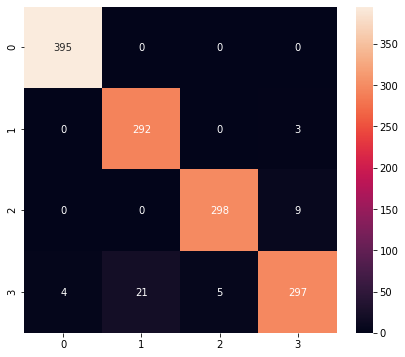

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       395
           1       0.93      0.99      0.96       295
           2       0.98      0.97      0.98       307
           3       0.96      0.91      0.93       327

    accuracy                           0.97      1324
   macro avg       0.97      0.97      0.97      1324
weighted avg       0.97      0.97      0.97      1324



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [ ]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [16]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [ ]:
# モデルを変換(量子化
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

# 推論テスト

In [17]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [18]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'input_1', 'index': 0, 'shape': array([ 1, 32]), 'shape_signature': array([-1, 32]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [19]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [20]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [21]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.9579909  0.01342559 0.00907356 0.01950999]
0
